# Exercise 1


In [135]:
import numpy as np
import numpy.random as ra
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import sklearn
import math

For inverse transform sampling we need to work out the CDFs for both likelihoods:

-> for Y=0: P(X=x|Y=0) = 2-2x

CDF (c) is integral of this wrt x: c = 2x - x²

Inverse-CDF: x = -sqrt(-c+1) + 1 (other solution ignored since we want this part)


-> for Y=1: P(X=x|Y=1) = 2x

CDF is integral of this wrt x: c = x²

Inverse-CDF: x = sqrt(c)

In [142]:
#this function does what the exercises requires
def create_data(N): #N is number of data instances
    labels = ra.uniform(0,1,N) #sample from uniform distribution to get a label
    labels[labels >= 0.5] = 1 #assign labels based on random sampling
    labels[labels < 0.5] = 0
    features = []
    
    for i in labels:
        rand = float(ra.uniform(0,1,1))#sample from uniform distribution to get a random number as input for CDF
        if i==1:
            features.append(math.sqrt(rand))
        elif i==0:
            features.append(-math.sqrt(-rand+1)+1)
        else:
            print("Error; label assignement did not work")
        
    return labels, features

In [143]:
y,x = create_data(100000)
#print(y)
#print(x)

counter = 0
x0 = []
x1 = []

#split datasets via label for better visualisation
for i in x:
    if y[counter]==1:
        x1.append(i)
    elif y[counter]==0:
        x0.append(i)
    counter+=1
    
print(x0)
print(x1)

[0.4539019315058096, 0.30613327692994075, 0.008568485129145542, 0.07643180523230775, 0.4440653423126856, 0.6836228785370693, 0.6884465994979082, 0.37745024209903144, 0.5483071259876373, 0.3215511696639235, 0.12216325696147412, 0.6242246675069019, 0.19223002448561488, 0.3359417796139448, 0.4191931738316428, 0.3306061159007414, 0.21186200880878348, 0.11801498705893931, 0.09790501959435105, 0.021397768890799362, 0.16986551188053134, 0.28139673681099764, 0.13453025756333625, 0.2257957603841757, 0.29473499729238073, 0.12931678312787898, 0.3910298090364661, 0.5113637932800568, 0.08395884814795984, 0.38265185695705817, 0.23674693341073771, 0.24526380110448065, 0.28508174197551406, 0.6740491216377171, 0.4415106163006841, 0.43368321422296263, 0.18423749736801076, 0.4305840059526934, 0.09901693346967122, 0.0427135487081326, 0.007261970427647424, 0.1455703321259595, 0.6782825170278003, 0.29294061229608914, 0.6058486428743983, 0.21683021392255297, 0.04386403296909103, 0.12213170246003535, 0.617291

(array([  18.,   74.,   92.,  148.,  195.,  246.,  274.,  287.,  342.,
         368.,  440.,  462.,  477.,  522.,  581.,  608.,  668.,  725.,
         734.,  793.,  806.,  818.,  941.,  907., 1062.,  998., 1046.,
        1110., 1108., 1150., 1227., 1207., 1314., 1312., 1335., 1390.,
        1450., 1565., 1503., 1528., 1677., 1706., 1707., 1691., 1787.,
        1858., 1883., 1943., 1951., 1977.]),
 array([0.00303352, 0.02297274, 0.04291197, 0.0628512 , 0.08279042,
        0.10272965, 0.12266887, 0.1426081 , 0.16254732, 0.18248655,
        0.20242577, 0.222365  , 0.24230422, 0.26224345, 0.28218267,
        0.3021219 , 0.32206112, 0.34200035, 0.36193957, 0.3818788 ,
        0.40181802, 0.42175725, 0.44169647, 0.4616357 , 0.48157493,
        0.50151415, 0.52145338, 0.5413926 , 0.56133183, 0.58127105,
        0.60121028, 0.6211495 , 0.64108873, 0.66102795, 0.68096718,
        0.7009064 , 0.72084563, 0.74078485, 0.76072408, 0.7806633 ,
        0.80060253, 0.82054175, 0.84048098, 0.86042021, 

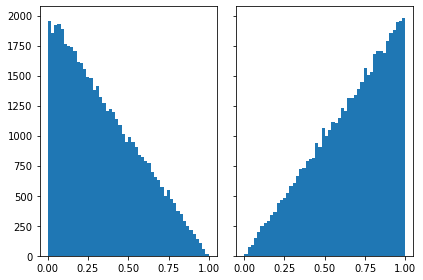

In [144]:
#histgram plotting
n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#color= ['red' if l == 0 else 'green' for l in y]
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x0, bins=n_bins)
axs[1].hist(x1, bins=n_bins)